# Elastic Net Regressor


In [77]:
import pandas as pd

# As colunas estão separadas pelo símbolo ';' #. 
weather_history = pd.read_csv('rdu-weather-history.csv', parse_dates=['date'], sep=';')


# Substituindo as string por números binários -- No = 0.0 e Yes = 1.0
weather_history = weather_history.replace('No', 0.0)
weather_history = weather_history.replace('Yes', 1.0)

from sklearn.preprocessing import Imputer
import numpy as np

null_values = ['temperaturemin', 'temperaturemax', 'precipitation', 'snowfall', 'snowdepth', 'avgwindspeed',
             'fastest2minwinddir', 'fastest2minwindspeed', 'fastest5secwinddir', 'fastest5secwindspeed'
            ]
#Substituindo os valores nulos pela média dos valores referentes a feature
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
for i in null_values:
    weather_history[[i]]= imputer.fit_transform(weather_history[[i]])

(0, 'date')


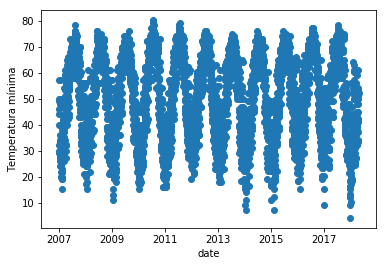

(1, 'temperaturemax')


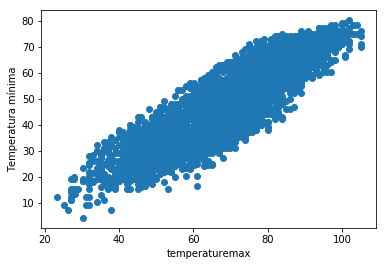

(2, 'precipitation')


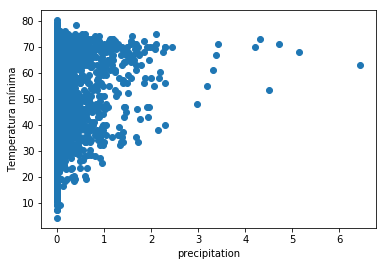

(3, 'snowfall')


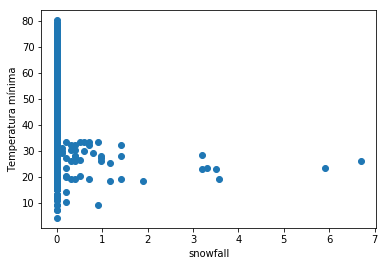

(4, 'snowdepth')


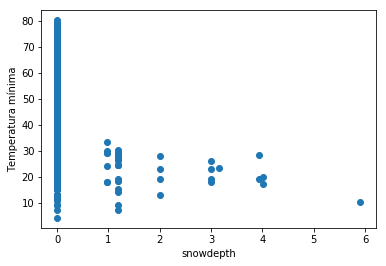

(5, 'avgwindspeed')


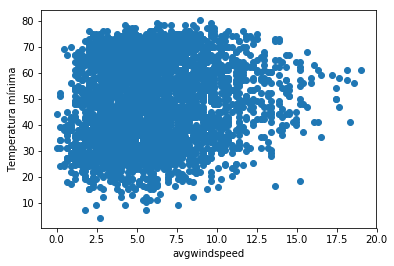

(6, 'fastest2minwinddir')


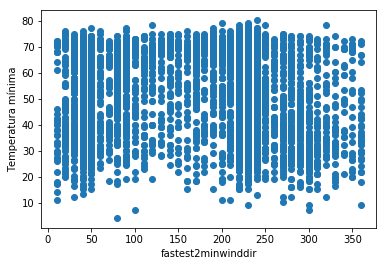

(7, 'fastest2minwindspeed')


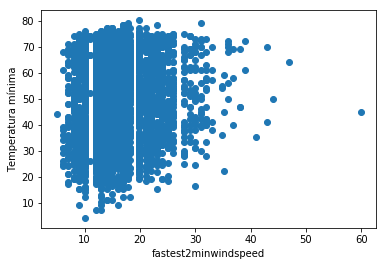

(8, 'fastest5secwinddir')


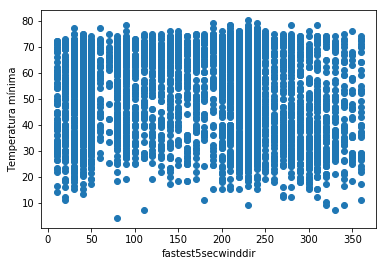

(9, 'fastest5secwindspeed')


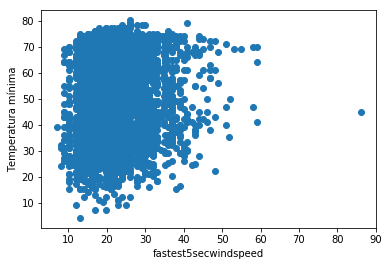

In [78]:
import matplotlib.pyplot as plt
X = weather_history.drop('temperaturemin', axis=1).values
y = weather_history['temperaturemin'].values

weather_history_no_min = weather_history.drop('temperaturemin', axis=1)

X_new = weather_history_no_min
for i in enumerate(weather_history_no_min.columns):
    related_value = weather_history_no_min[i[1]].values
    if not np.array_equal(np.unique(related_value), [0, 1.]):
        print(i)
        plt.scatter(related_value, y)
        plt.ylabel(str('Temperatura mínima'))
        plt.xlabel(str(i[1]))
        plt.show()
    else:
        X_new = X_new.drop(i[1], axis=1)

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

X_new_new = X_new.drop('date', axis=1)
X_new_new = X_new_new.drop('fastest5secwinddir', axis=1)
# X_new_new = X_new_new.drop('season', axis=1)
# X_new_new = X_new_new.drop('fastest2minwinddir', axis=1)
# X_new_new = X_new_new.drop('snowdepth', axis=1)
# X_new_new = X_new_new.drop('snowfall', axis=1)
X_new_new = X_new_new.values
regr = ElasticNet(random_state=0)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_new_new, y, test_size=0.25, random_state=42)
regr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
regr.coef_
regr.score(X_train, y_train)

0.8392372908960944